In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load the dataset
df = pd.read_csv('data/kidney_disease.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [5]:
df.shape

(400, 26)

In [6]:
df.drop('id',axis=1,inplace=True)

In [7]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


## data preprocessing

In [9]:
# columns modified for user friendliness
col={'age': 'age',
     'bp': 'blood_pressure',
     'sg': 'specific_gravity',
     'al': 'albumin',
     'su': 'sugar',
     'rbc': 'red_blood_cells',
     'pc': 'pus_cell',
     'pcc': 'pus_cell_clumps',
     'ba': 'bacteria',
     'bgr': 'blood_glucose_random',
     'bu': 'blood_urea',
     'sc': 'serum_creatinine',
     'sod': 'sodium',
     'pot': 'potassium',
     'hemo': 'hemoglobin',
     'pcv': 'packed_cell_volume',
     'wc': 'white_blood_cell_count',
     'rc': 'red_blood_cell_count',
     'htn': 'hypertension',
     'dm': 'diabetes_mellitus',
     'cad': 'coronary_artery_disease',
     'appet': 'appetite',
     'pe': 'pedal_edema',
     'ane': 'anemia',
     'classification': 'class'}
df.rename(columns=col, inplace=True)

In [10]:
df.head(400)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [11]:
# since pcv(packed_cell_volume) is wrongly identified as object we must convert it
text_columns = ['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']
for i in text_columns:
    print(f"{i} : {df[i].dtype}")

packed_cell_volume : object
white_blood_cell_count : object
red_blood_cell_count : object


In [12]:
def convert_text_to_numeric(df,column):
    # Convert text to numeric, coercing errors to NaN
    # This is useful for columns that are incorrectly identified as object type
    df[column] = pd.to_numeric(df[column],errors ='coerce')

for column in text_columns:
    convert_text_to_numeric(df,column)
    print(f"{column} : {df[column].dtype}")

packed_cell_volume : float64
white_blood_cell_count : float64
red_blood_cell_count : float64


In [13]:
#Handling missing values
missing = df.isnull().sum()
# Displaying the top 20 columns with missing values
missing[missing > 0].sort_values(ascending=False).head(20)

red_blood_cells           152
red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
pus_cell                   65
hemoglobin                 52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
pus_cell_clumps             4
bacteria                    4
hypertension                2
diabetes_mellitus           2
dtype: int64

## Filling Null values of both numerical values and categorical values

In [14]:
# It is used to fill missing values in numerical columns (age, blood_pressure, etc.)
# It gets filled with mean value of the column

def mean_value_imputation(df, column):
    # Fill NaN values with the mean of the column
    mean_value = df[column].mean()
    df[column] = df[column].fillna(value=mean_value)

# It is used to fill missing values in categorical columns (pus_cell, pus_cell_clumps, bacteria.. etc)
# It gets filled with of maximum frequency (mode) of the column

def mode_value_imputation(df, column):
    # Fill NaN values with the mode of the column
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(value=mode_value)


In [15]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [16]:
# numerival columns in a array amd categorical columns in a array
# using list comprehension to get the columns
num_cols = [col for col in df.columns if df[col].dtype != 'object']
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
print(f"Numerical columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")   

Numerical columns: ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']
Categorical columns: ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class']


In [17]:
# Imputing missing values for numerical columns with mean

for col_name in num_cols:
    mean_value_imputation(df, col_name)

# Imputing missing values for categorical columns with mode

for col_name in cat_cols:
    mode_value_imputation(df,col_name)


In [18]:
df.isnull().sum()   

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [19]:
df.head(400)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47.0,6700.0,4.900000,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54.0,7800.0,6.200000,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49.0,6600.0,5.400000,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,51.0,7200.0,5.900000,no,no,no,good,no,no,notckd


## Modifying categorical values to its unique value

In [20]:
# Displaying unique values for specific columns
# In this output we can see same values but in a different format

print(f"diabetes_mellitus: {df['diabetes_mellitus'].unique()}")
print(f"coronary_artery_disease: {df['coronary_artery_disease'].unique()}")
print(f"classification: {df['class'].unique()}")

diabetes_mellitus: ['yes' 'no' ' yes' '\tno' '\tyes']
coronary_artery_disease: ['no' 'yes' '\tno']
classification: ['ckd' 'ckd\t' 'notckd']


In [21]:
# Replacing values in categorical columns to standardize them
# This is done to ensure consistency in the data
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace={' yes':'yes','\tyes':'yes','\tno':'no'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace={'\tno':'no'})
df['class'] = df['class'].replace(to_replace={'ckd\t':'ckd'})

In [22]:
print(f"diabetes_mellitus: {df['diabetes_mellitus'].unique()}")
print(f"coronary_artery_disease: {df['coronary_artery_disease'].unique()}")
print(f"classification: {df['class'].unique()}")

diabetes_mellitus: ['yes' 'no']
coronary_artery_disease: ['no' 'yes']
classification: ['ckd' 'notckd']


## Feature encoding

#### Converting categorical values into numerical values

In [23]:
df[cat_cols]

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [24]:
# ML cannot work with categorical values, so we need to convert them into numerical values
# using simple (mapping) since only two categories are present in the columns
# if multiple categories are present then we must use different encoding method


df['red_blood_cells'] = df['red_blood_cells'].map({'normal': 1, 'abnormal': 0})
df['pus_cell'] = df['pus_cell'].map({'normal': 1, 'abnormal': 0})
df['pus_cell_clumps'] = df['pus_cell_clumps'].map({'present': 1, 'notpresent': 0})
df['bacteria'] = df['bacteria'].map({'present': 1, 'notpresent': 0})
df['hypertension'] = df['hypertension'].map({'yes': 1, 'no': 0})
df['diabetes_mellitus'] = df['diabetes_mellitus'].map({'yes': 1, 'no': 0})
df['coronary_artery_disease'] = df['coronary_artery_disease'].map({'yes': 1, 'no': 0})
df['appetite'] = df['appetite'].map({'good': 1, 'poor': 0})
df['pedal_edema'] = df['pedal_edema'].map({'yes': 1, 'no': 0})
df['anemia'] = df['anemia'].map({'yes': 1, 'no': 0})
df['class'] = df['class'].map({'ckd': 1 ,'notckd': 0})


In [25]:
# Displaying the modified categorical columns
df.head(400)

print(f"classification: {df['class'].unique()}")

classification: [1 0]


## Correlation Test

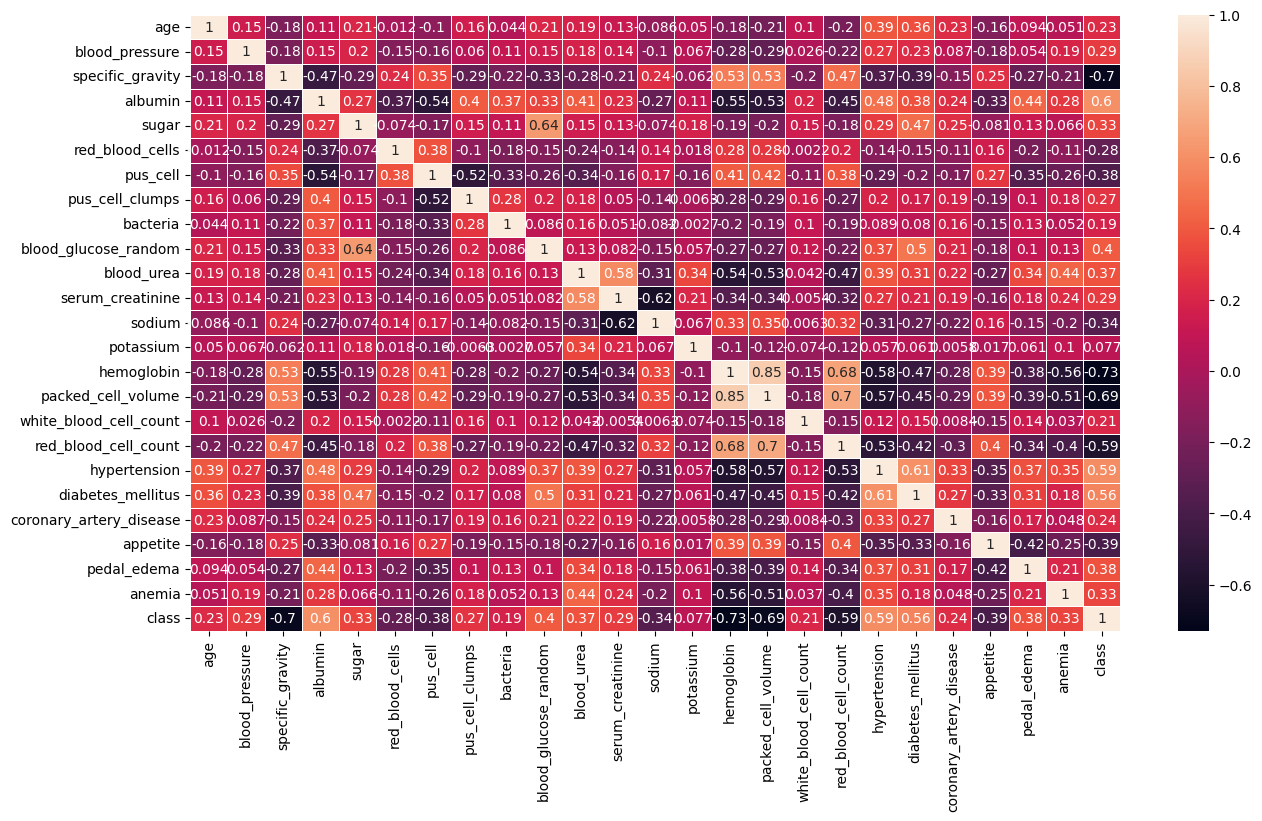

In [26]:
# how each feature is related to other features
# we are using heatmap to visualize the correlation matrix 
# figsize is used to set the size of the figure

plt.figure(figsize=(15,8))

# 1: Perfect positive correlation
# 0: No correlation
# -1: Perfect negative correlation

sns.heatmap(df.corr(),annot = True, linewidths= 0.5)  # to make the correlation value to be on the heat grid we use annotation 
plt.show()

In [27]:
# This will give us the correlation of each feature with the target variable 'class'

target_corr = df.corr()['class'].abs().sort_values(ascending=False)[1:]
target_corr


hemoglobin                 0.729628
specific_gravity           0.698957
packed_cell_volume         0.690060
albumin                    0.599238
red_blood_cell_count       0.590913
hypertension               0.590438
diabetes_mellitus          0.559060
blood_glucose_random       0.401374
appetite                   0.393341
pus_cell                   0.375154
pedal_edema                0.375154
blood_urea                 0.372033
sodium                     0.342288
sugar                      0.327812
anemia                     0.325396
serum_creatinine           0.294079
blood_pressure             0.290600
red_blood_cells            0.282642
pus_cell_clumps            0.265313
coronary_artery_disease    0.236088
age                        0.225405
white_blood_cell_count     0.205274
bacteria                   0.186871
potassium                  0.076921
Name: class, dtype: float64

#### ** With this correlation value we can find whether the features are useful are not
#### ** Example potassium,bacteria all these are not that usefull in finding the class of chronic disease

## Building A Model For Prediction

In [28]:
# using sklearn train_test_split to split the data into training and testing sets

# from sklearn.model_selection import train_test_split


df['class'].value_counts()

class
1    250
0    150
Name: count, dtype: int64

In [29]:
# we are going to split it as x --> other columns y --> target columns

x = df.drop("class",axis = 1)
y = df["class"]

# Splitting the dataset into training and testing sets
# test_size=0.25 means 25% of the data will be used for testing
# random_state=42 is used to ensure reproducibility of the results

x_train,x_test,y_train,y_test = train_test_split(x , y, test_size=0.25, random_state = 25)

print(f" 'X_train' shape : {x_train.shape}")
print(f" 'X_test' shape :  {x_test.shape}")

 'X_train' shape : (300, 24)
 'X_test' shape :  (100, 24)


## Decision Tree Algorithim

In [30]:
# decision tree classifier is a supervised learning algorithm used for classificationtasks
# it works by splitting the data into subsets based on the value of input features

# from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()

# fit the model to the training data
# it learns the patterns in the training data to make predictions on new data
# it learns the relationship between the input features and the target variable
# it understands the details of each feature and how they contribute to the target variable

dct.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
# testing the model on the test data
# it uses the learned patterns from the training data to make predictions on new data

y_pred_dct = dct.predict(x_test)
y_pred_dct

# we are giving x_test to the model to get the predictions
# it returns the predicted class labels for the test data
# if y_pred_dct is equal to that of y_test then the model is accurate
# we can compare the predicted values with the actual values to evaluate the model's performance

# if not equal then the model needs to be tuned or retrained
# we can use various metrics to evaluate the model's performance such as accuracy, precision, recall


array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1])

#### Using other algoritms to compare performance in an array

In [32]:
# we are going to use other algorithms to compare the performance of the model
# we are also going to apply all the algorithms in an array

# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC

models = []

# Naive Bayes is a simple and efficient algorithm based on Bayes' theorem
# it assumes that the features are independent of each other

models.append(('Naive Bayes',GaussianNB()))

# KNeighborsClassifier is a supervised learning algorithm used for classification tasks
# it works by finding the k-nearest neighbors to a given data point and assigning the class

models.append(('KNN',KNeighborsClassifier(n_neighbors=8)))

# Random Forest Classifier is an ensemble learning method that combines multiple decision trees
# it works by creating a forest of decision trees and averaging their predictions

models.append(('Random Forest Classifier',RandomForestClassifier()))

# SVC (Support Vector Classifier) is a supervised learning algorithm used for classification tasks
# it works by finding the hyperplane that best separates the data points of different classes

models.append(('SVM',SVC(kernel='linear')))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))

In [33]:
for name,model in models:
    print(name,model)
    print()
    model.fit(x_train,y_train)
    # y_pred takes only one params (x_test)
    y_pred = model.predict(x_test)
    # from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
    # we are using confusion matrix to evaluate the performance of the model  
    
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print("accuracy : ",accuracy_score(y_test,y_pred))
    print('\n')
    print("precision : ",precision_score(y_test,y_pred))
    print('\n')
    print("recall : ",recall_score(y_test,y_pred))
    print('\n')
    print("f1_score : ",f1_score(y_test,y_pred))
    print("\n")

Naive Bayes GaussianNB()

[[37  0]
 [ 5 58]]


accuracy :  0.95


precision :  1.0


recall :  0.9206349206349206


f1_score :  0.9586776859504132


KNN KNeighborsClassifier(n_neighbors=8)

[[31  6]
 [18 45]]


accuracy :  0.76


precision :  0.8823529411764706


recall :  0.7142857142857143


f1_score :  0.7894736842105263


Random Forest Classifier RandomForestClassifier()

[[35  2]
 [ 0 63]]


accuracy :  0.98


precision :  0.9692307692307692


recall :  1.0


f1_score :  0.984375


SVM SVC(kernel='linear')

[[34  3]
 [ 2 61]]


accuracy :  0.95


precision :  0.953125


recall :  0.9682539682539683


f1_score :  0.9606299212598425


Decision Tree Classifier DecisionTreeClassifier()

[[35  2]
 [ 1 62]]


accuracy :  0.97


precision :  0.96875


recall :  0.9841269841269841


f1_score :  0.9763779527559056




In [34]:
# the best model is random forest

# Random Forest Classifier RandomForestClassifier()

# [ 35 2 ]  --> 35 has cronic disease and the model identifies it correctly    &&  2 people do not have cronic disease but model gave output as chronic  
# [ 0  63]  --> 0 people do have cronic but model gave output as not chronic   &&  63 do not have cronic disease and the model identifies it correctly

# accuracy :  0.98
# precision :  0.9692307692307692
# recall :  1.0
# f1_score :  0.984375


In [35]:
# for tunig we can use hyperparameter tuning /cross validation etc for making the model more accurate